# Kaggleの「Extended_Employee_Performance_and_Productivity_Data」

このノートブックでは、Kaggleの「Extended_Employee_Performance_and_Productivity_Data」問題を通じて、データ分析の一連の流れを学びます。
目標は、〇を予測することです。
回帰問題の一例であり、簡易な回帰問題で解くことにします。

## Step1: 必要なライブラリのインポート
まずはじめに、データ分析に必要なライブラリをインポートします。以下のライブラリが必要です。

- pandas: データフレームを扱うためのライブラリ
- sklearn.model_selection: データセットを訓練データとテストデータに分割するための関数
- sklearn.linear_model: 線形回帰モデルのクラス
- sklearn.metrics: モデルの評価指標（MSE）を計算するための関数

-import matplotlib.pyplot as plt
-import seaborn as sns
-import japanize_matplotlib　を追加

In [20]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Step2: データの読み込みとデータの基礎分析
pandasのread_csv関数を使って、住宅価格のデータセット（CSV形式）を読み込みます。

In [21]:
# データの読み込み
# pandasのread_csv関数を使って、CSV形式のデータを読み込みます。
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [22]:
# 基本的な統計量の計算
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [23]:
# ラベルエンコーディングを実施
df['OverTime_bin'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# 数値変数全体で相関行列を再計算
numeric_cols_updated = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix_updated = df[numeric_cols_updated].corr()

# 離職との相関を取得して、絶対値が大きい順にソート
attrition_corr_updated = corr_matrix_updated['Attrition_bin'].drop('Attrition_bin').sort_values(key=abs, ascending=False)
print(attrition_corr_updated)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [24]:
# 各カラムの欠損値の数を確認
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [25]:
# 無関係な列を削除
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
df

In [26]:
# ラベルエンコーダーの初期化
labelencoder = LabelEncoder()

# カテゴリ変数のリスト
categorical_vars = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']



In [30]:
# カテゴリ変数を数値に変換
for var in categorical_vars:
    df[var] = labelencoder.fit_transform(df[var])

# データを特徴量(X)とターゲット(y)に分割
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# データをトレーニングセット(70%)とテストセット(30%)に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# 決定木分類器を初期化
dt_model = DecisionTreeClassifier(random_state=1)

# モデルをトレーニングデータにフィット
dt_model.fit(X_train, y_train)

# テストデータで目的変数を予測
y_pred_dt = dt_model.predict(X_test)

# モデルの精度を計算
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# 分類レポートを計算
class_report_dt = classification_report(y_test, y_pred_dt)

# 混同行列を計算
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

accuracy_dt, class_report_dt, conf_matrix_dt

(0.7732426303854876,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.87      0.86       364\n           1       0.34      0.32      0.33        77\n\n    accuracy                           0.77       441\n   macro avg       0.60      0.60      0.60       441\nweighted avg       0.77      0.77      0.77       441\n',
 array([[316,  48],
        [ 52,  25]]))

In [54]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [31]:
# 特徴の重要度を取得
feature_importances_dt = dt_model.feature_importances_

# 可視化のためのデータフレームを作成
importances_df_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_dt
})

# 重要度でデータフレームをソート
importances_df_dt = importances_df_dt.sort_values(by='Importance', ascending=False)

importances_df_dt

,Feature,Importance
15,MonthlyIncome,0.085485
11,JobLevel,0.067762
18,OverTime,0.063004
23,TotalWorkingYears,0.061662
24,TrainingTimesLastYear,0.061090
27,YearsInCurrentRole,0.056927
0,Age,0.049305
4,DistanceFromHome,0.047290
10,JobInvolvement,0.046883
22,StockOptionLevel,0.042094


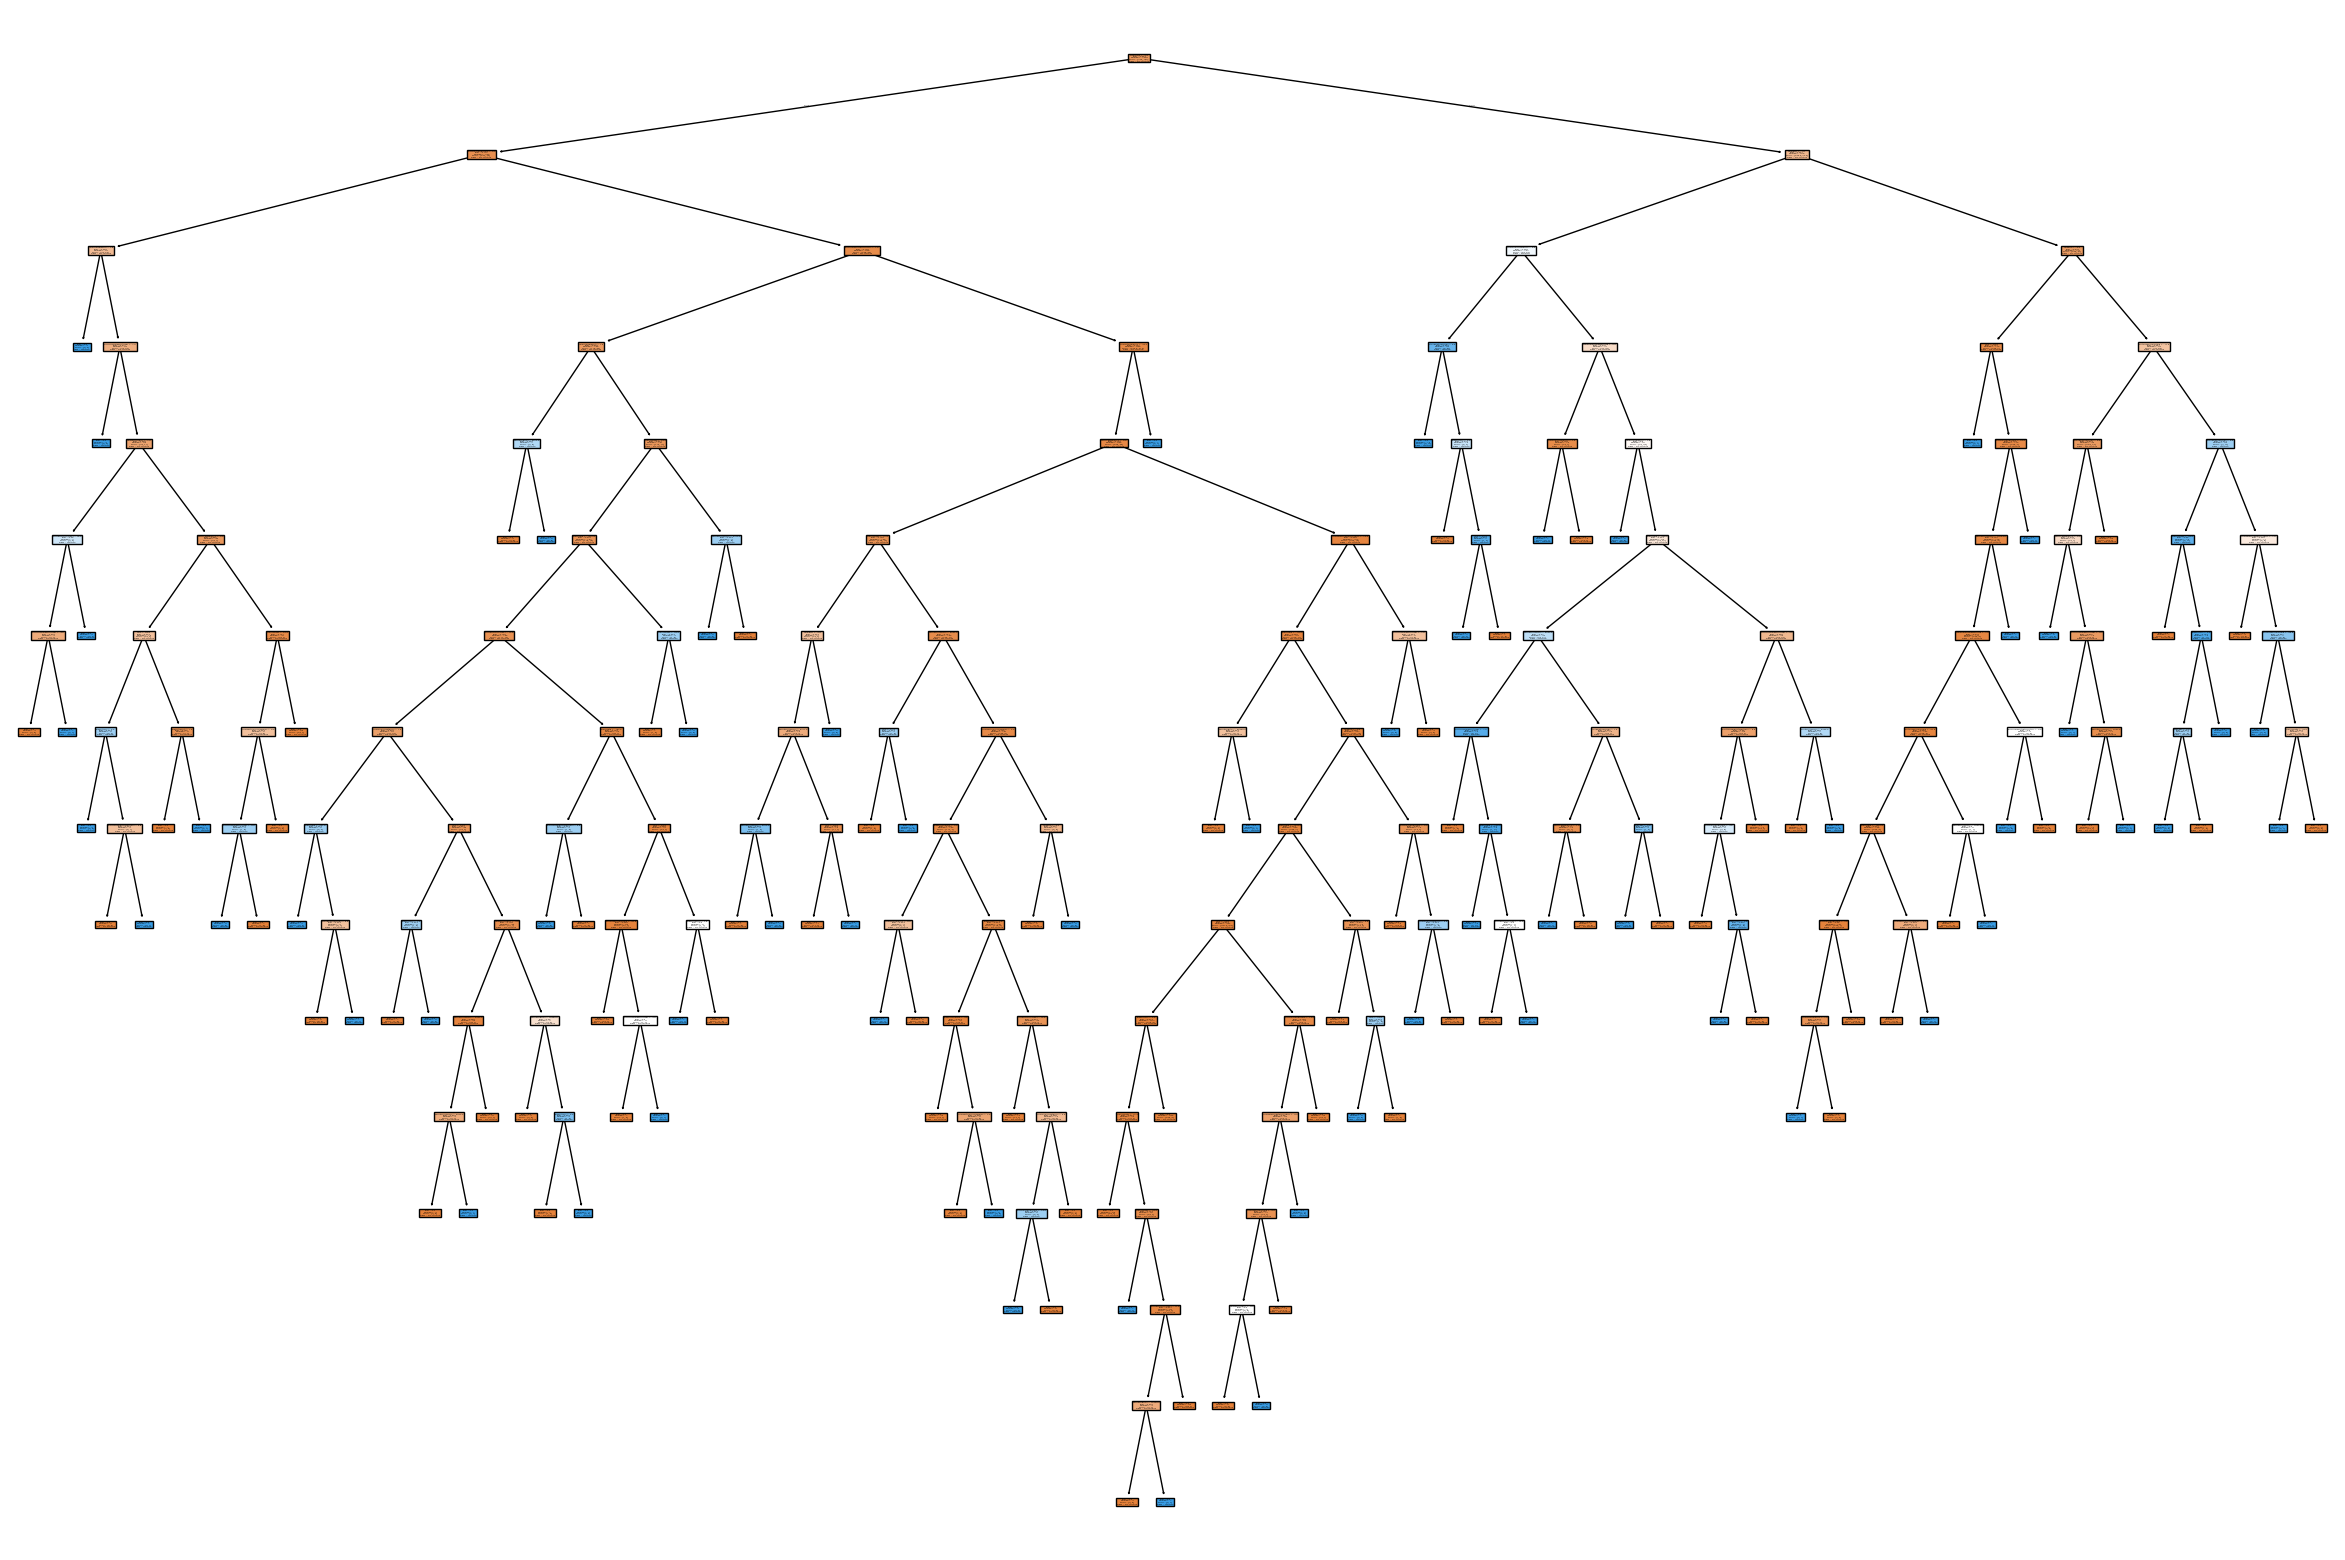

In [32]:
from sklearn import tree
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(30,20))

# Create a decision tree plot
tree.plot_tree(dt_model,
               feature_names=X_train.columns,
               class_names=['No Attrition', 'Attrition'],
               filled=True)

# Show the plot
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ラベルエンコーダーを初期化
labelencoder = LabelEncoder()

# カテゴリー変数のリスト
categorical_vars = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# カテゴリー変数を変換
for var in categorical_vars:
    df[var] = labelencoder.fit_transform(df[var])

# データを特徴量(X)とターゲット(y)に分割
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# データを訓練セット(70%)とテストセット(30%)に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# ランダムフォレスト分類器を初期化
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

# モデルを訓練データに適合
rf_model.fit(X_train, y_train)

# テストデータのターゲット変数を予測
y_pred = rf_model.predict(X_test)

# モデルの精度を計算
accuracy = accuracy_score(y_test, y_pred)

# 分類レポートを計算
class_report = classification_report(y_test, y_pred)

# 混同行列を計算
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, class_report, conf_matrix

(0.8367346938775511,
 '              precision    recall  f1-score   support\n\n           0       0.84      0.99      0.91       364\n           1       0.67      0.13      0.22        77\n\n    accuracy                           0.84       441\n   macro avg       0.75      0.56      0.56       441\nweighted avg       0.81      0.84      0.79       441\n',
 array([[359,   5],
        [ 67,  10]]))

In [35]:
# 特徴量の重要度を取得
feature_importances = rf_model.feature_importances_

# 可視化のためのデータフレームを作成
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# 重要度によってデータフレームを並び替え
importances_df = importances_df.sort_values(by='Importance', ascending=False)

importances_df

,Feature,Importance
15,MonthlyIncome,0.074976
2,DailyRate,0.061783
0,Age,0.059573
18,OverTime,0.056446
4,DistanceFromHome,0.054376
9,HourlyRate,0.051200
16,MonthlyRate,0.051134
23,TotalWorkingYears,0.049810
26,YearsAtCompany,0.037418
12,JobRole,0.036277


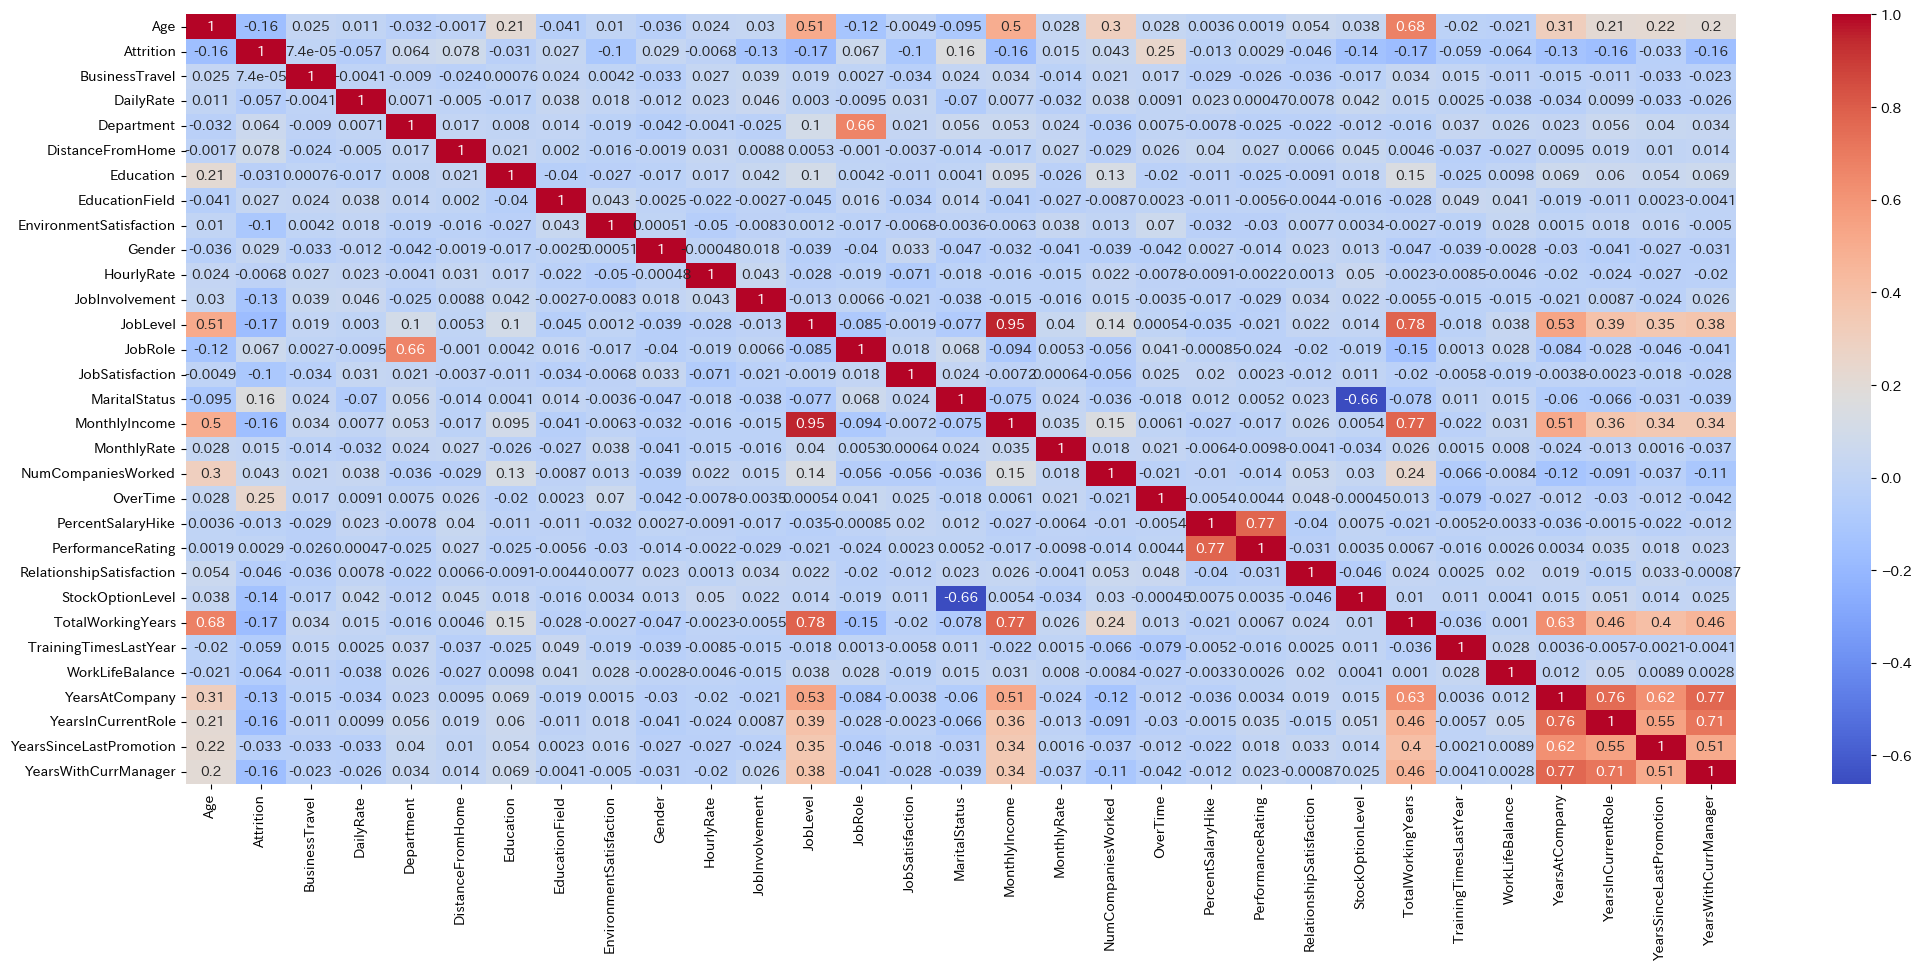

In [36]:
df_check = df.select_dtypes(include=['int', 'float'])
corr_matrix = df_check.corr()


# 相関のヒートマップを表示
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

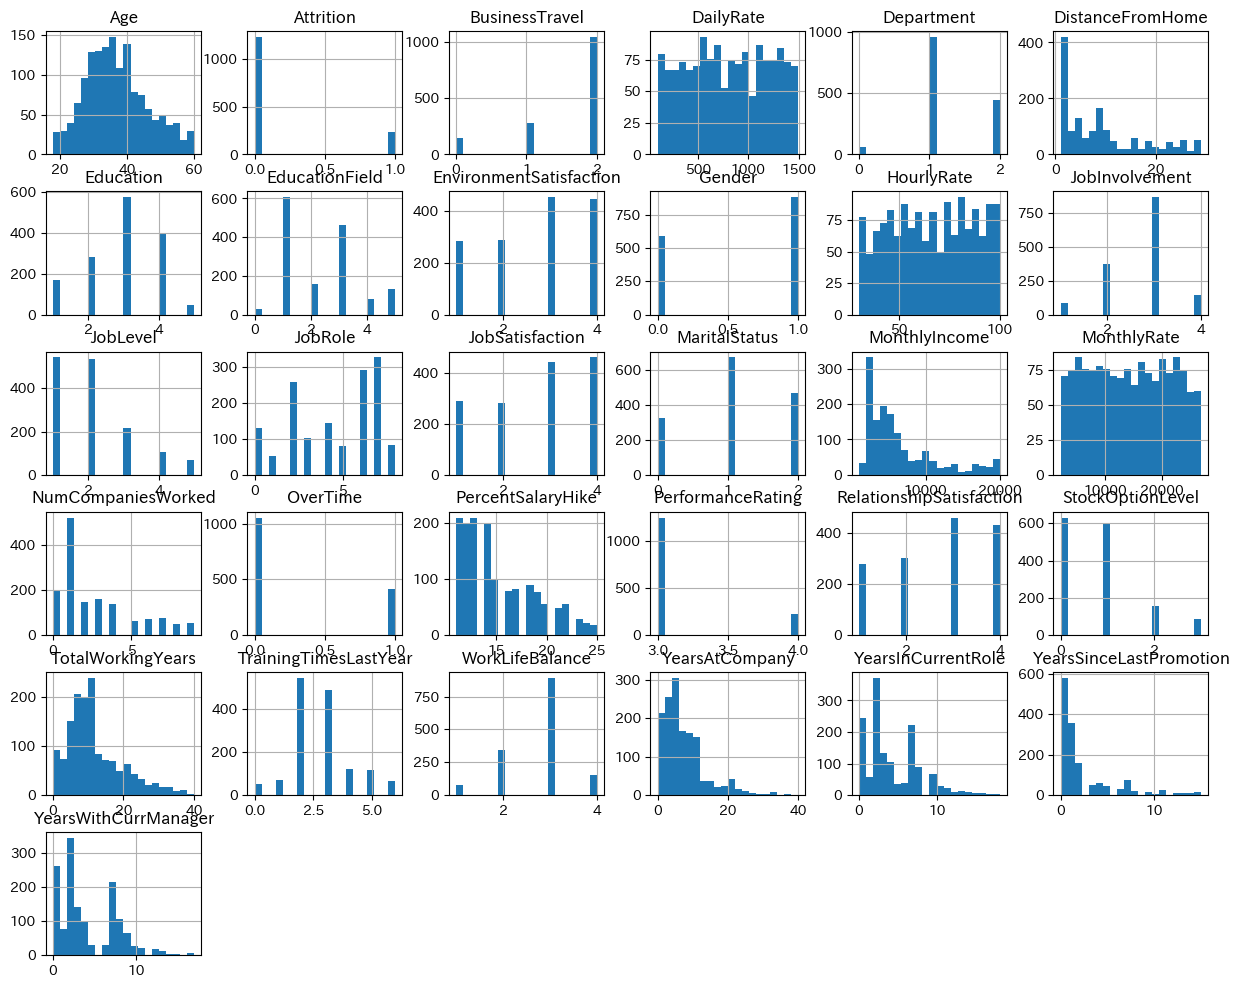

In [37]:
# 特徴量の分布を確認
df.hist(figsize=(15,12),bins = 20)
plt.title("Features Distribution")
plt.show()

# カテゴリ変数のバランスを確認
for col in df.columns:
    if df[col].dtype == 'object':
        print('\n', col)
        print(df[col].value_counts())

In [52]:
# コリレーション計算を出力、特定のカラムに限定
def calculate_specific_correlations(df, specific_columns, department_column='Department', target_column='Attrition'):
    departments = df[department_column].unique()
    department_correlations = pd.DataFrame(index=specific_columns, columns=departments)

    for department in departments:
        dept_df = df[df[department_column] == department]
        corr_matrix = dept_df[specific_columns].corrwith(dept_df[target_column])
        department_correlations[department] = corr_matrix
    
    return department_correlations

# 特定のカラムとの相関を計算
specific_columns = ['MonthlyIncome', 'DailyRate', 'Age', 'OverTime', 'DistanceFromHome', 'HourlyRate', 'MonthlyRate', 'TotalWorkingYears']
specific_correlations = calculate_specific_correlations(df, specific_columns)

# 結果を表示
print(specific_correlations)

                          2         1         0
MonthlyIncome     -0.132122 -0.177994 -0.248233
DailyRate         -0.070836 -0.052105 -0.001862
Age               -0.128923 -0.155915 -0.409466
OverTime           0.264547  0.244398  0.160452
DistanceFromHome   0.090808  0.055222  0.284284
HourlyRate        -0.035664  0.013210 -0.031406
MonthlyRate        0.063482 -0.007901 -0.042130
TotalWorkingYears -0.157500 -0.167634 -0.302170


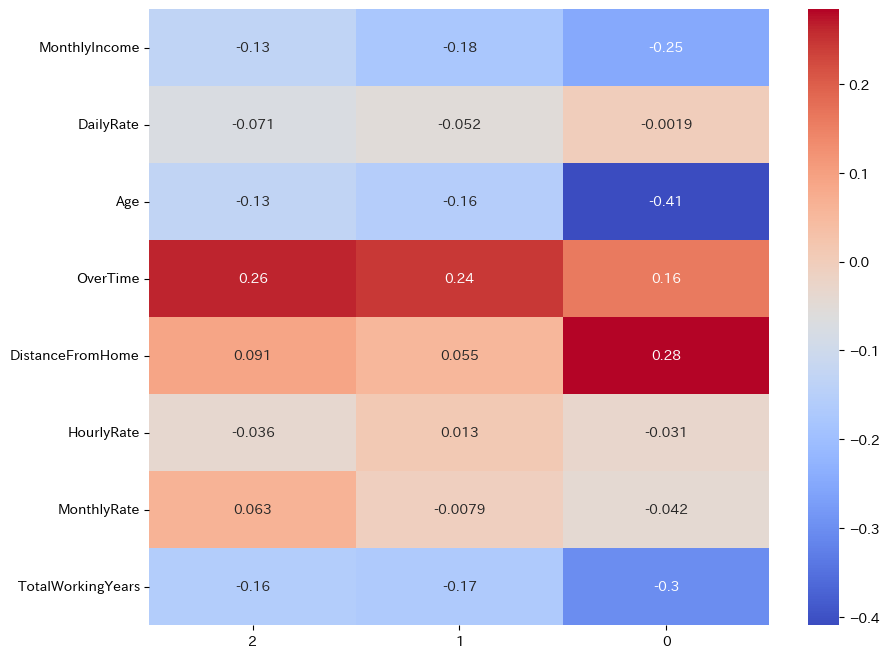

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(specific_correlations, annot=True, cmap='coolwarm')
plt.show()

# 1:Sales ,2:Research & Development ,0:Human Resources 

Text(0.5, 1.0, 'MonthlyIncome vs DistanceFromHome')

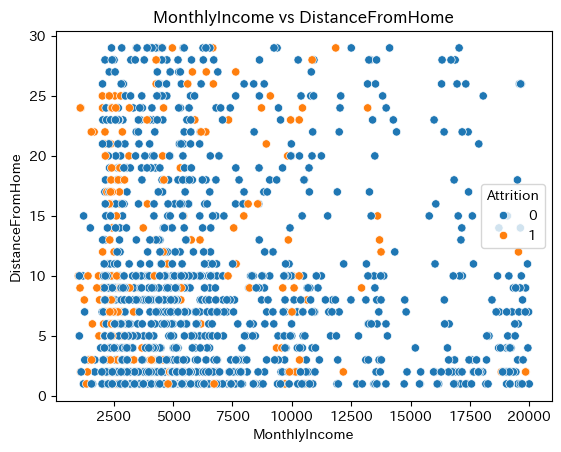

In [56]:
sns.scatterplot(x='MonthlyIncome', y='DistanceFromHome', hue='Attrition', data=df)
plt.title('MonthlyIncome vs DistanceFromHome') 


## Step3: データの前処理
データの前処理では、欠損値の補完や特徴量の選択などを行います。今回は、単純化のために数値データのみを使用し、欠損値は0で補完します

In [57]:
# データの前処理  欠損処理はないため不要
# この例では、単純化のために数値データのみを使用します。また、欠損値は0で補完します。
#（numpyを使わない場合は、データを選択する際に、df.select_dtypes(include=[np.number])の代わりに、df.select_dtypes(include=['int', 'float'])と選択したり、統計量から確認して、必要なカラムを指定しても良い。
# 本来は、数値以外のカテゴリーデータ等も有効活用することで、更なる精度向上が期待できる
df = df.select_dtypes(include=[np.number]).fillna(0)


## Step4: 特徴量と目的変数の選択
特徴量とはモデルが予測を行うために使用するデータのことで、目的変数とは予測を行う対象のデータのことです。この例では、特徴量は目的変数（SalePrice）以外の全ての数値カラムを使用し、目的変数はSalePriceカラムの値とします。

In [ ]:
# 特徴量と目的変数の選択
# 慣習で説明変数はX、目的変数はyと表記することが多い
# 特徴量は目的変数（SalePrice）以外の全ての数値カラムを使用します。
# 目的変数はSalePriceカラムの値とします。

X = df.drop(["Attrition"], axis=1)  # Attrition以外の全ての数値カラム
y = df["Attrition"] # RAttritionカラムの値(y)
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## Step5: データセットの分割
train_test_split関数を使ってデータセットを訓練用とテスト用に分割します。モデルの性能を評価するためには、訓練には使用していないデータでテストを行う必要があります。

In [59]:
# 線形回帰モデルの訓練
# LinearRegressionクラスのインスタンスを作成し、fitメソッドを使ってモデルを訓練します。
model = LogisticRegression()
model.fit(X_train, y_train)


c:\Users\tachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step7: モデルの評価
訓練したモデルがどれだけの性能を持つかを評価します。この例では、predictメソッドを使って訓練データとテストデータの予測値を計算し、mean_squared_error関数を使って訓練データとテストデータの平均二乗誤差（MSE）を計算します。MSEは予測誤差の平均値で、値が小さいほどモデルの予測精度が高いことを示します。

In [60]:
# モデルの評価
# predictメソッドを使って訓練データとテストデータの予測値を計算します。
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# そしてmean_squared_error関数を使って訓練データとテストデータの平均二乗誤差（MSE）を計算します。
# ただし、最終的な評価はKaggle側で用意されたテストデータに対する予測精度（RMSLE等）による
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)


In [61]:
print('訓練データのMSE:', train_mse)
print('テストデータのMSE:', test_mse)

訓練データのMSE: 0.1554907677356657
テストデータのMSE: 0.1746031746031746
